In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from root_numpy import root2array, rec2array
import matplotlib.pyplot as plt
%matplotlib tk

branch_names = '''momentumx, momentumy,momentumz,momentum,energy,position,MvdDEDX,MvdHits,SttMeanDEDX,SttHits,GemHits,
TofStopTime,TofM2,TofTrackLength,TofQuality,TofBeta,DrcThetaC,DrcQuality,DiscThetaC,DiscQuality,
EmcRawEnergy,EmcCalEnergy,EmcQuality,EmcNumberOfCrystals,EmcNumberOfBumps,EmcModule,
EmcZ20,EmcZ53,EmcLat,EmcE1,EmcE9,EmcE25,MuoQuality,MuoIron,MuoMomentumIn,MuoNumberOfLayers,MuoModule,MuoHits,
DegreesOfFreedom,ChiSquared'''.split(",")


branch_names = [c.strip() for c in branch_names]
branch_names = list(branch_names)
###################################################################################

electrons = root2array('/home/wesmail/Downloads/EvtGen/twoFS/EvtGenEMinus_tree.root', 't1', branch_names)
electrons = rec2array(electrons)

pions = root2array('/home/wesmail/Downloads/EvtGen/twoFS/EvtGenPiMinus_tree.root', 't1', branch_names)
pions = rec2array(pions)

muons = root2array('/home/wesmail/Downloads/EvtGen/twoFS/EvtGenMuMinus_tree.root', 't1', branch_names)
muons = rec2array(muons)

kaons = root2array('/home/wesmail/Downloads/EvtGen/twoFS/EvtGenKMinus_tree.root', 't1', branch_names)
kaons = rec2array(kaons)

anti_p = root2array('/home/wesmail/Downloads/EvtGen/twoFS/EvtGenPMinus_tree.root', 't1', branch_names)
anti_p = rec2array(anti_p)

###################################################################################
X = np.concatenate((electrons, pions, muons, kaons, anti_p))
y = np.concatenate(( np.zeros(electrons.shape[0]),np.ones(pions.shape[0]), (2*np.ones(muons.shape[0])), (3*np.ones(kaons.shape[0])), (4*np.ones(anti_p.shape[0])) ))
df = pd.DataFrame(np.hstack((X, y.reshape(y.shape[0], -1))),columns=branch_names+['temp'])

# added features
#df['E9/E25'] = df.loc[:,'EmcE9']/df.loc[:,'EmcE25']
#df['E1/E25'] = df.loc[:,'EmcE1']/df.loc[:,'EmcE25']
df['E/p'] = df.loc[:,'EmcCalEnergy']/df.loc[:,'momentum']
df['labels'] = df.loc[:,'temp']
df = df.drop(['temp'], axis=1)
#df = df.dropna()
print(len(df.columns))

Welcome to ROOTaaS 6.06/02
42


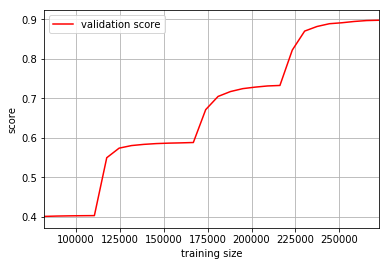

In [11]:
from sklearn.learning_curve import learning_curve
from sklearn.ensemble import RandomForestClassifier

fig, ax = plt.subplots()

Nrf, train_lc_rf, val_lc_rf = learning_curve(RandomForestClassifier(random_state=0, n_jobs=-1), df.iloc[:,0:-1], df.iloc[:,-1], cv=3,train_sizes=np.linspace(0.25, 1, 30))

#ax.plot(Nrf, np.mean(train_lc_rf, 1), color='blue', label='training score')
ax.plot(Nrf, np.mean(val_lc_rf, 1), color='red', label='validation score')
ax.grid()
ax.set_xlim(N[0], Nrf[-1])
ax.set_xlabel('training size')
ax.set_ylabel('score')
ax.legend(loc='best')